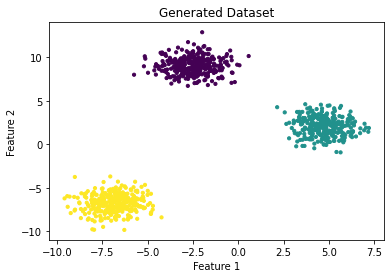

K = 3: Accuracy values: [1.0, 1.0, 1.0, 1.0, 1.0], Mean Accuracy: 1.00
K = 5: Accuracy values: [0.679, 0.69, 0.691, 0.682, 0.676], Mean Accuracy: 0.68
K = 7: Accuracy values: [0.472, 0.486, 0.605, 0.567, 0.621], Mean Accuracy: 0.55


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import defaultdict
from random import sample
from itertools import permutations
from sklearn.metrics import accuracy_score


# Uzaklik fonksiyonu olarak Oklid kullaniyorum
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Centroid'lerin rast gele ilk secimi
def initialize_centroids(X, k):
    random_indices = sample(range(len(X)), k)
    centroids = X[random_indices]
    return centroids

#Algoritmanin ilk adimi. Veri noktalari ve centroidler arasindaki mesafelarin hesaplanip
# verilerin centroid'lere gonderilmesi
def assign_clusters(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for i, x in enumerate(X):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(i)
    return clusters

#Algoritmanin ikinci adimi: Centroidlerin guncellenmesi
def update_centroids(X, clusters):
    centroids = np.zeros((len(clusters), X.shape[1]))
    for i, cluster in enumerate(clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[i] = new_centroid
    return centroids


# ana fonksiyon
def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return clusters, centroids


#kumeleme sonucunun basarisini olculmesi
def cluster_accuracy(y_true, clusters):
    n_clusters = len(clusters)
    n_samples = len(y_true)

    y_pred = np.empty(n_samples, dtype=np.int64)
    for i, cluster in enumerate(clusters):
        for idx in cluster:
            y_pred[idx] = i

    # Compute accuracy for all possible permutations of predicted labels
    accuracies = []
    for permutation in permutations(range(n_clusters)):
        y_permuted = np.zeros(n_samples)
        for i in range(n_clusters):
            y_permuted[y_pred == i] = permutation[i]
        accuracy = accuracy_score(y_true, y_permuted)
        accuracies.append(accuracy)

    # Return the best accuracy
    return max(accuracies)


# Sentetik verinin uretilmesi. 3 kume iceren, 2 boyutlu 1000 veri noktasi
n_samples = 1000
n_features = 2
random_state = 42
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=None, random_state=random_state)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=10, c=y_true, cmap='viridis')
plt.title("Sentetik Veri Seti ")
plt.xlabel("Degisken 1")
plt.ylabel("Degisken 2")
plt.show()

k_values = [3, 5, 7]
n_runs = 5
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange']

results = defaultdict(list)

for k in k_values:
    for _ in range(n_runs):
        clusters, centroids = k_means(X, k)
        accuracy = cluster_accuracy(y_true, clusters)
        results[k].append(accuracy)

# Print accuracy for each cluster number and each run
for k, accuracy_values in results.items():
    print(f"K = {k}: Accuracy values: {accuracy_values}, Mean Accuracy: {np.mean(accuracy_values):.2f}")



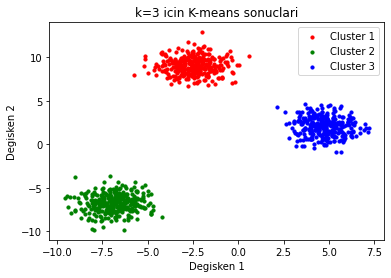

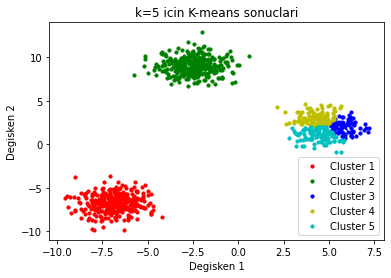

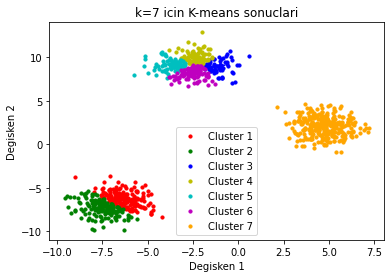

In [11]:
# 3,5,7 kume sayilari icin K-means sonuclarinin grafik uzerinde gosterilmesi 
for k in k_values:
    clusters, centroids = k_means(X, k)
    
    plt.title(f"k={k} icin K-means sonuclari")
    plt.xlabel("Degisken 1")
    plt.ylabel("Degisken 2")
    
    for i, cluster in enumerate(clusters):
        plt.scatter(X[cluster, 0], X[cluster, 1], s=10, c=colors[i], label=f"Cluster {i + 1}")
        plt.scatter(centroids[i, 0], centroids[i, 1], s=100, c=colors[i], marker='*')
    
    plt.legend()
    plt.show()
